# Projectile motion with Stokes' drag

https://en.wikipedia.org/wiki/Stokes%27_law

https://en.wikipedia.org/wiki/Projectile_motion

$$ \frac{d}{dt} \left[ \begin{array}{c} x \\ y \\ v_x \\ v_y \\ \end{array} \right] =
\left[ \begin{array}{c} v_x \\ v_y \\ -\mu v_x | v | \\ -g-\mu v_y|v| \\ \end{array} \right]
$$

$$ |v| = \sqrt{v_x^2 + v_y^2}$$

$$ \left\{ \begin{eqnarray}
v_x & = & v_0 \cos\theta \\
v_y & = & v_0 \sin\theta \\
\end{eqnarray} \right. $$

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [18]:
def projectile_dt(X,t,mu,g):
    x,y,vx,vy = X # X = [x,y,vx,vy]
    v = np.sqrt(vx**2+vy**2)
    return vx,vy,-mu*vx*v,-g-mu*vy*v

In [155]:
v0 = 20 # m/s
theta = 0.5

In [156]:
x0 = 0
y0 = 0
v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
X0 = [x0,y0,v0x,v0y]

In [170]:
tmax = 2
dt = 0.01
t = np.arange(0, tmax+dt, dt)

In [177]:
g = 9.81

mu = 0
X = odeint(projectile_dt, X0, t, args=(mu,g))

mu = 0.02
Xmu = odeint(projectile_dt, X0, t, args=(mu,g))

In [178]:
x, y = X[:,0], X[:,1]
xmu,ymu = Xmu[:,0], Xmu[:,1]

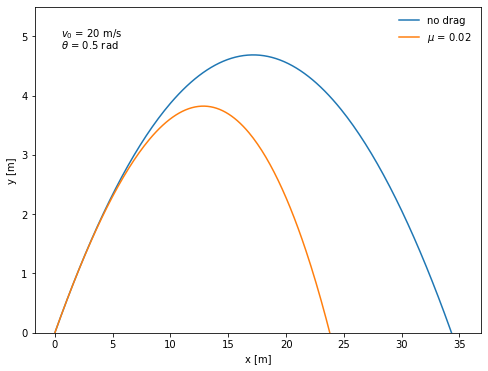

In [188]:
fig = plt.figure(figsize=(8, 6), dpi=72)

ax = fig.add_subplot(111)

plt.plot(x,y,label="no drag")
plt.plot(xmu,ymu,label="$\mu$ = {}".format(mu))

_ = ax.set_ylim(0,5.5)

plt.text(0.5,5.0, r'$v_0$ = {} m/s'.format(v0))
plt.text(0.5,4.8, r'$\theta$ = {} rad'.format(theta))

plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(loc='best',frameon=False)
plt.show()

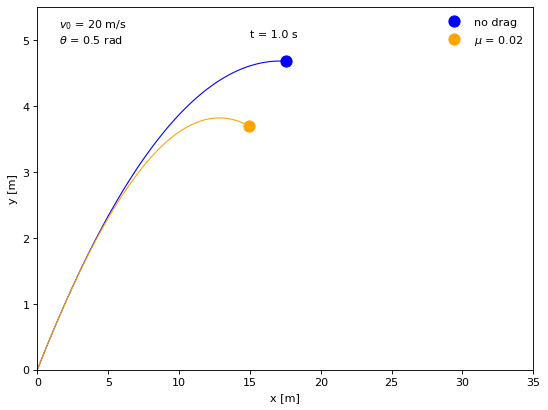

In [207]:
# plot one time snapshot

i = 100

plt.figure(figsize=(8,6),dpi=80)

plt.plot(x[:i],y[:i],"-",linewidth=1,color='blue')
plt.plot(x[i],y[i],"o",markersize=10,color='blue',label="no drag")

plt.plot(xmu[:i],ymu[:i],"-",linewidth=1,color='orange')
plt.plot(xmu[i],ymu[i],"o",markersize=10,color='orange',label="$\mu$ = {}".format(mu))

plt.xlim([0,35])
plt.ylim([0,5.5])
plt.text(1.5,5.20, r'$v_0$ = {} m/s'.format(v0))
plt.text(1.5,4.95, r'$\theta$ = {} rad'.format(theta))
plt.text(15.,5.05, r't = {} s'.format(t[i]))
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(loc='best',frameon=False)
plt.show()

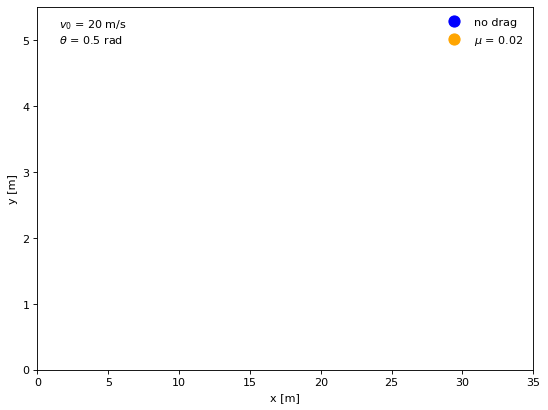

In [218]:
fig, ax = plt.subplots(figsize=(8,6),dpi=80)
l, = plt.plot([],[],"-",linewidth=1,color='blue')
b, = plt.plot([],[],"o",markersize=10,color='blue',label="no drag")
lmu, = plt.plot([],[],"-",linewidth=1,color='orange')
bmu, = plt.plot([],[],"o",markersize=10,color='orange',label="$\mu$ = {}".format(mu))
plt.xlim([0,35])
plt.ylim([0,5.5])
plt.text(1.5,5.20, r'$v_0$ = {} m/s'.format(v0))
plt.text(1.5,4.95, r'$\theta$ = {} rad'.format(theta))
time = plt.text(15.,5.05,"")
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend(loc='best',frameon=False)
plt.show()

In [224]:
from matplotlib.animation import FuncAnimation, FFMpegWriter
%matplotlib inline
from IPython.display import HTML, Image

def projectile_init():
    l.set_data([],[])
    b.set_data([],[])
    lmu.set_data([],[])
    bmu.set_data([],[])
    time.set_text("")
    return (l,)

def projectile_animate(i):
    l.set_data(x[:i],y[:i])
    b.set_data(x[i],y[i])
    lmu.set_data(xmu[:i],ymu[:i])
    bmu.set_data(xmu[i],ymu[i])
    time.set_text(r't = {:4.2f} s'.format(t[i]))
    return (l,)

anim = FuncAnimation(fig,projectile_animate,frames=range(len(t)),init_func=projectile_init,blit=True)

In [225]:
HTML(anim.to_html5_video())

In [226]:
anim.save('projectile.gif', writer='imagemagick', fps=30)

In [227]:
Image(url='projectile.gif')